In [5]:
# check the distribution of MO-ASMO objective functions

In [7]:
import numpy as np
import os, glob, sys, toml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations
from matplotlib.backends.backend_pdf import PdfPages

if __name__ == '__main__':

    basinnum = 12
    nmet = 22
    # nmet = 19
    metrics = np.nan * np.zeros([basinnum, 400, nmet])
    
    for basin in range(basinnum):
        if np.mod(basin, 50)==0:
            print('basin', basin)
                   
        configfile = f'/glade/work/guoqiang/CTSM_CAMELS/Calib_HH_MOASMO/configuration/_level1-{basin}_config_MOASMO.toml'
        config = toml.load(configfile)
        iterflag = 0
    
        for trialflag in range(400):
        
            if config['path_calib'] == 'NA':
                path_MOASMOcalib = f'{path_CTSM_base}_MOASMOcalib'
            else:
                path_MOASMOcalib = config['path_calib']
            path_archive = f'{path_MOASMOcalib}/ctsm_outputs'
            caseflag = f'iter{iterflag}_trial{trialflag}'
            outfile_metric = f'{path_archive}/{caseflag}/evaluation_many_metrics.csv'

            if os.path.isfile(outfile_metric):
                try:
                    df = pd.read_csv(outfile_metric)
                    metrics[basin, trialflag, :] = df.values[0]
                except:
                    print('failed reading')


metnames = df.columns.values
# for m in ['kge', 'cc', 'nse']:
for m in ['kge', 'cc', 'nse', 'kge_log_q', 'kge_summer', 'kge_winter', 'kge_spring', 'kge_autumn']:
    ind1 = np.where(metnames==m)[0][0]
    metrics[:,:,ind1] = 1 - metrics[:,:,ind1] # minimize values
    metnames[ind1] = '1-'+m

print('metric names', metnames)

basin 0


KeyboardInterrupt: 

In [ ]:
# Plot scatter plots between metric pairs

def plot_two_metrics(metrics, metnames, met1, met2):
    font = {'size'   : 8}
    matplotlib.rc('font', **font)

    fig = plt.figure(figsize=[8,5])

    ind1 = np.where(metnames==met1)[0][0]
    ind2 = np.where(metnames==met2)[0][0]
    
    for b in range(12):
        ax  = fig.add_subplot(3, 4, b+1)
    
        data1 = metrics[b, :, ind1]
        data2 = metrics[b, :, ind2]
        ax.scatter(data1, data2, 2)
        ax.set_xlabel(met1,)
        ax.set_ylabel(met2)
        ax.set_title(f'basin {b}')
    
    plt.tight_layout()
    plt.show()


met1 = 'max_mon_abs_err'
met2 = 'ge_q50_mae'
plot_two_metrics(metrics, metnames, met1, met2)

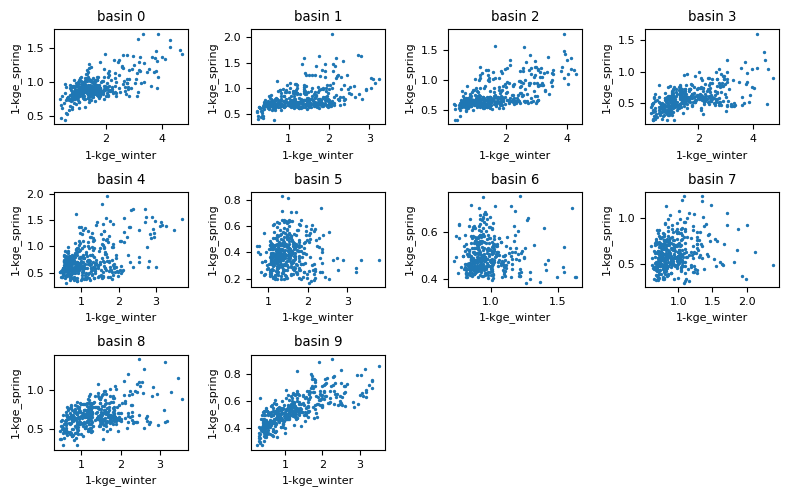

In [63]:
# metric names ['1-kge' 'mae' '1-nse' '1-cc' 'rmse' 'max_mon_abs_err' 'q90_mae' 'q10_mae'
#  'q90_days_err' 'q10_days_err' '1-kge_log_q' '1-kge_summer' '1-kge_winter'
#  '1-kge_spring' '1-kge_autumn' 'mae_summer' 'mae_winter' 'mae_spring'
#  'mae_autumn']


met1 = '1-kge_winter'
met2 = '1-kge_spring'
plot_two_metrics(metrics, metnames, met1, met2)

In [64]:
# plot different combination and save to pdf

from matplotlib.backends.backend_pdf import PdfPages

def plot_two_metrics_to_pdf(metrics, metnames, met1, met2, pdf):
    font = {'size': 8}
    matplotlib.rc('font', **font)

    fig = plt.figure(figsize=[8, 5])

    ind1 = np.where(metnames == met1)[0][0]
    ind2 = np.where(metnames == met2)[0][0]
    
    for b in range(basinnum):
        ax = fig.add_subplot(3, 4, b + 1)

        data1 = metrics[b, :, ind1]
        data2 = metrics[b, :, ind2]
        ax.scatter(data1, data2, 2)
        ax.set_xlabel(met1)
        ax.set_ylabel(met2)
        ax.set_title(f'basin {b}')
    
    plt.tight_layout()
    pdf.savefig(fig)  # Save the figure to the PDF file
    plt.close(fig)  # Close the figure to avoid displaying it with plt.show()


tempuse = ['1-kge_summer', '1-kge_winter', '1-kge_spring', '1-kge_autumn']
combinations_of_two = list(combinations(tempuse, 2))

with PdfPages('10basin_seasonal_kge.pdf') as pdf:  # This will create the PDF file
    for comb in combinations_of_two:
        met1 = comb[0]
        met2 = comb[1]
        plot_two_metrics_to_pdf(metrics, metnames, met1, met2, pdf)

In [66]:
tempuse = ['mae_summer', 'mae_winter', 'mae_spring', 'mae_autumn']
combinations_of_two = list(combinations(tempuse, 2))

with PdfPages('10basin_seasonal_mae.pdf') as pdf:  # This will create the PDF file
    for comb in combinations_of_two:
        met1 = comb[0]
        met2 = comb[1]
        plot_two_metrics_to_pdf(metrics, metnames, met1, met2, pdf)

In [72]:
met1 = 'max_mon_abs_err'
combinations_of_two = []
for m in metnames:
    if m != met1:
        combinations_of_two.append([met1, m])

with PdfPages('10basin_fix_max_mon_abs_err.pdf') as pdf:  # This will create the PDF file
    for comb in combinations_of_two:
        met1 = comb[0]
        met2 = comb[1]
        plot_two_metrics_to_pdf(metrics, metnames, met1, met2, pdf)

In [86]:
met1 = 'max_mon_abs_err'
combinations_of_two = []
for m in ['1-kge','1-nse','1-cc','rmse', 'mae', 'ge_q25_mae','ge_q50_mae','ge_q75_mae']:
    if m != met1:
        combinations_of_two.append([met1, m])

with PdfPages('10basin_fix_max_mon_abs_err.pdf') as pdf:  # This will create the PDF file
    for comb in combinations_of_two:
        met1 = comb[0]
        met2 = comb[1]
        plot_two_metrics_to_pdf(metrics, metnames, met1, met2, pdf)

In [84]:
met2

'ge_q25_maege_q50_maege_q75_mae'